In [3]:
html_code ="""<div style="text-align: center; background-color: #f0f0f0; padding: 20px;">
    <h1 style="color: #333;">Wine_Quality_Prediction</h1>
</div>"""

HTML(html_code)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from IPython.display import HTML

In [4]:
train=pd.read_csv('winequality-red.csv')

In [5]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
train['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
train.groupby('quality')['fixed acidity'].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,8.360000,1.770875,6.7,7.15,7.50,9.875,11.6
4,53.0,7.779245,1.626624,4.6,6.80,7.50,8.400,12.5
5,681.0,8.167254,1.563988,5.0,7.10,7.80,8.900,15.9
6,638.0,8.347179,1.797849,4.7,7.00,7.90,9.400,14.3
7,199.0,8.872362,1.992483,4.9,7.40,8.80,10.100,15.6
8,18.0,8.566667,2.119656,5.0,7.25,8.25,10.225,12.6


In [9]:

HTML("""
<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #ddd; border-radius: 5px;">
    <h2 style="color:purple; text-align: center;margin:10px;">Checking Correlation with Fixed Acidity</h2>
</div>
""")


C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


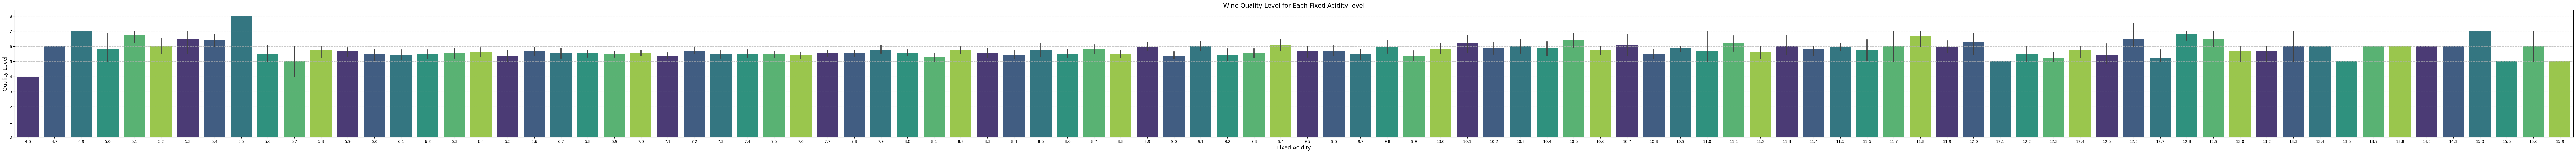

In [50]:
#checking dependency between wine qualtiy and fixed acidity
colors = sns.color_palette("viridis", n_colors=len(train['quality'].unique()))
plt.figure(figsize=(120, 6))
sns.barplot(data=train, x='fixed acidity', y='quality', palette=colors)

plt.title('Wine Quality Level for Each Fixed Acidity level', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Quality Level', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


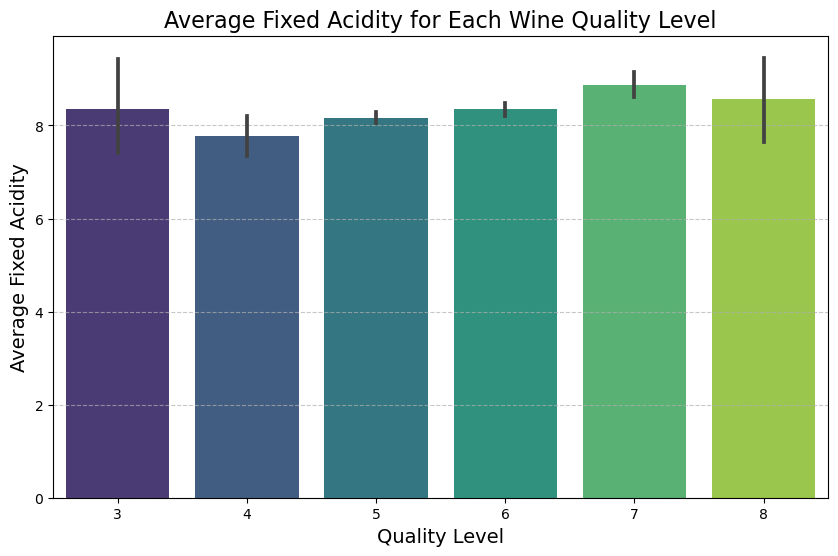

In [10]:
colors = sns.color_palette("viridis", n_colors=len(train['quality'].unique()))
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='quality', y='fixed acidity', palette=colors)

plt.title('Average Fixed Acidity for Each Wine Quality Level', fontsize=16)
plt.xlabel('Quality Level', fontsize=14)
plt.ylabel('Average Fixed Acidity', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
#conclusion: not very strong correlation between quality of wine and fixed acidity level

In [12]:
HTML("""
<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #ddd; border-radius: 5px;">
    <h2 style="color:purple; text-align: center;margin:10px;">Checking Correlation with Volatile Acidity</h2>
</div>
""")


C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


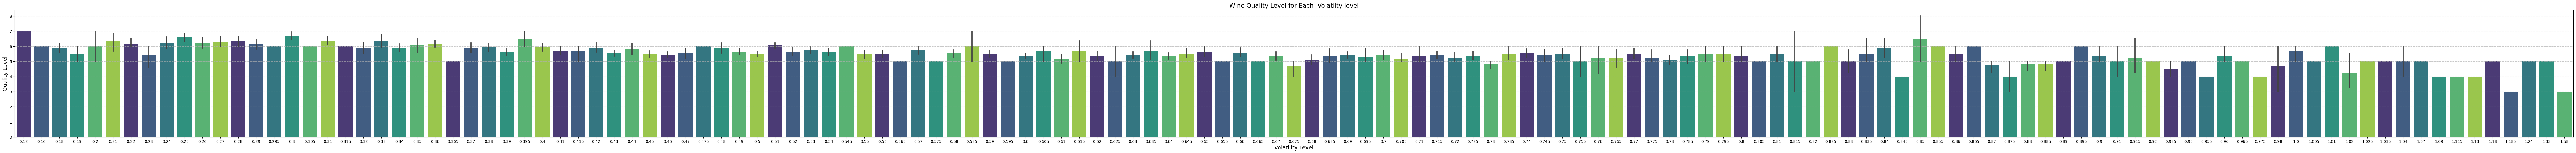

In [13]:
colors = sns.color_palette("viridis", n_colors=len(train['quality'].unique()))
plt.figure(figsize=(120, 6))
sns.barplot(data=train, x='volatile acidity', y='quality', palette=colors)

plt.title('Wine Quality Level for Each  Volatilty level', fontsize=16)
plt.xlabel('Volatility Level', fontsize=14)
plt.ylabel('Quality Level', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


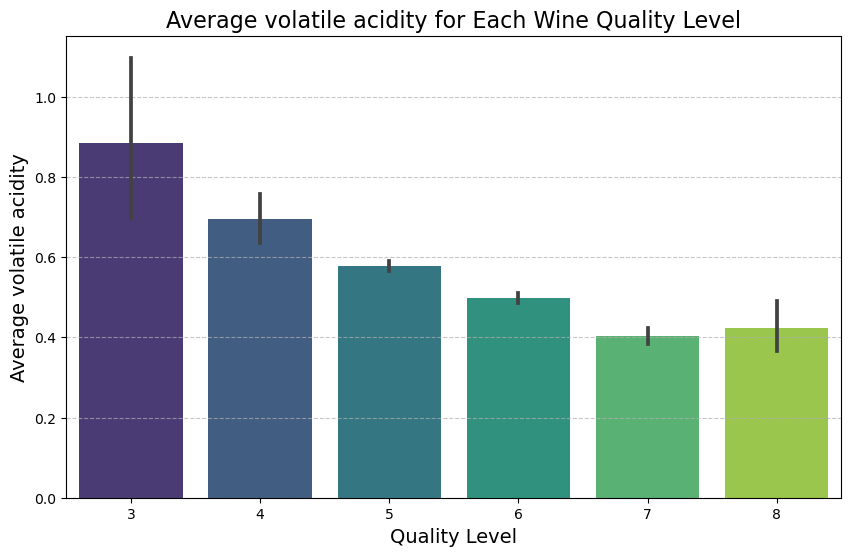

In [14]:
colors = sns.color_palette("viridis", n_colors=len(train['quality'].unique()))
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='quality', y='volatile acidity', palette=colors)

plt.title('Average volatile acidity for Each Wine Quality Level', fontsize=16)
plt.xlabel('Quality Level', fontsize=14)
plt.ylabel('Average volatile acidity', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
#it seems like there is a kind of negative correlation between quality level and volatile acidity!!!

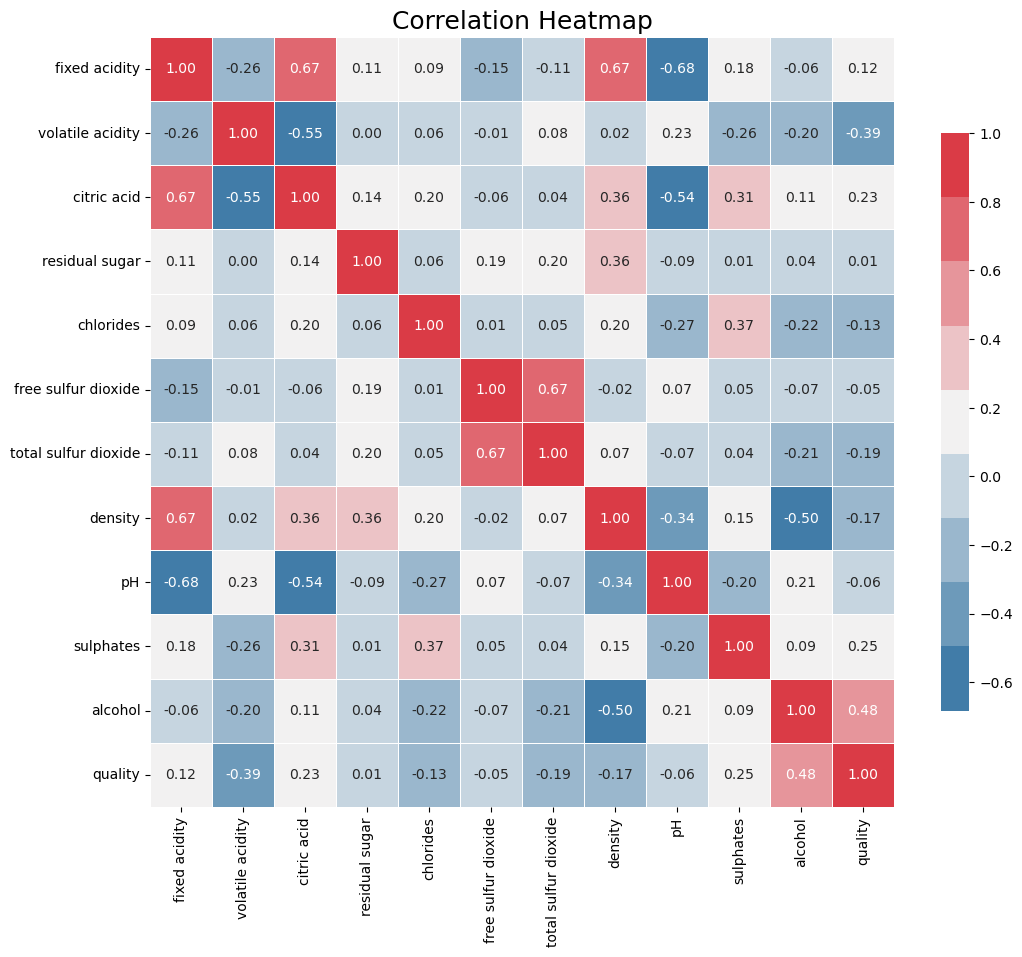

In [16]:
correlation_matrix = train.corr()
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap', fontsize=18)
plt.yticks(rotation=0)
plt.show()

In [17]:
# we can conclude that all the input features have effect on quality of the wine

In [18]:
HTML("""
<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #ddd; border-radius: 5px;">
    <h2 style="color:purple; text-align: center;margin:10px;">Model Training</h2>
</div>
""")

In [19]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
X=train.iloc[:,:11].values
Y=train.iloc[:,11:].values

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
HTML("""
<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #ddd; border-radius: 5px;">
    <h2 style="color:purple; text-align: center;margin:10px;">Linear regression</h2>
</div>
""")

In [27]:
model=LinearRegression()

In [28]:
model.fit(X_train,Y_train)

LinearRegression()

In [29]:
Y_predict_train=model.predict(X_train)
#calculation error and r2_score:
training_mean_squared_error=mean_squared_error(Y_train,Y_predict_train)
print(training_mean_squared_error)
training_r2_score=r2_score(Y_train,Y_predict_train)
print(training_r2_score)

0.4241911573137202
0.347992619353401


In [30]:
Y_predict_test=model.predict(X_test)
#calculation error and r2_score:
test_mean_squared_error=mean_squared_error(Y_test,Y_predict_test)
print(test_mean_squared_error)
test_r2_score=r2_score(Y_test,Y_predict_test)
print(test_r2_score)

0.3900251439643173
0.4031803412790673


In [31]:
# a very bad fit:

In [32]:
HTML("""
<div style="background-color: #f0f0f0; padding: 10px; border: 1px solid #ddd; border-radius: 5px;">
    <h2 style="color:purple; text-align: center;margin:10px;">Random Forest Regressor</h2>
</div>
""")

In [33]:
model = RandomForestRegressor(n_estimators=500, random_state=42)

In [34]:
model.fit(X_train,Y_train)

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=500, random_state=42)

In [35]:
Y_predict_train=model.predict(X_train)
#calculation error and r2_score:
training_mean_squared_error=mean_squared_error(Y_train,Y_predict_train)
print(training_mean_squared_error)
training_r2_score=r2_score(Y_train,Y_predict_train)
print(training_r2_score) 

0.04652838780297106
0.9284830630387516


In [36]:
Y_predict_test=model.predict(X_test)
#calculation error and r2_score:
test_mean_squared_error=mean_squared_error(Y_test,Y_predict_test)
print(test_mean_squared_error)
test_r2_score=r2_score(Y_test,Y_predict_test)
print(test_r2_score)

0.307614425
0.5292858960833247
